# Quasi-criticality in the Cortex

## Imports

In [ ]:
conda install -c conda-forge powerlaw


In [ ]:
'''Setup notebook environment -q flag suppresses output, if you want to see it, remove the -q flag'''
# %pip install -r requirements.txt -q
from utils.plotting_utils import *
from utils.data_utils import *
from utils.utils import simulate
from branching import BranchingNeurons
import os
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
import pandas as pd

## Branching model

In [ ]:
if os.path.exists('data/branching_data.csv'):
    data = load_data('data/branching_data.csv')
else:
    kwargs = {
        'N': 2500,
        'max_neighbors': 15,
        'visual': False,
    }
    data = simulate(BranchingNeurons, n_runs=3, duration=10000, **kwargs)


In [ ]:
def get_max__length(data):
    max_length = 0
    for j in range(len(data)):
        for i in range(len(data[j])):
            if len(data[j][i]) > max_length:
                max_length = len(data[j][i])
    return max_length

def pad_data_to_max_length(data, max_length):
    for j in range(len(data)):
        for i in range(len(data[j])):
            if len(data[j][i]) < max_length:
                data[j][i] = np.pad(data[j][i], (0, max_length - len(data[j][i])), 'constant', constant_values=(0, 0))
    return data

homogenous_data = np.array(pad_data_to_max_length(data, get_max__length(data)))

In [ ]:
duration_data = homogenous_data[:,0,:]
size_data = homogenous_data[:,1,:]

In [ ]:
flattened = size_data.flatten()
plt.hist(flattened, histtype='step', density=True)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:

# duration_data = duration_data.sort(axis=1)
# size_data = size_data.sort(axis=1)
# mean_duration = np.mean(duration_data, axis=0)
# mean_size = np.mean(size_data, axis=0)
mean_duration = duration_data[0]
mean_size = size_data[0]

plt.scatter(mean_duration, mean_size)
plt.xscale('log')
plt.yscale('log')
plt.show()

## BTW-like model

### Settings of parameters and writing data

In [ ]:
settings1 = [
    {"name": "round_spiral", "params": {"height": 4, "refractory_period": 5, "probability_of_spontaneous_activity": 0.02, "max_distance": 3, "random_connection": False}},
    {"name": "pulse_wave", "params": {"height": 5, "refractory_period": 4, "probability_of_spontaneous_activity": 0.03, "max_distance": 3, "random_connection": False}},
    {"name": "synchronous", "params": {"height": 3, "refractory_period": 5, "probability_of_spontaneous_activity": 0.015, "max_distance": 2.5, "random_connection": True}},
    {"name": "oscillatory", "params": {"height": 2, "refractory_period": 4, "probability_of_spontaneous_activity": 0.02, "max_distance": 3, "random_connection": False}},
    {"name": "repeating", "params": {"height": 2, "refractory_period": 4, "probability_of_spontaneous_activity": 0.02, "max_distance": 3, "random_connection": True}},
    {"name": "random", "params": {"height": 5, "refractory_period": 5, "probability_of_spontaneous_activity": 0.02, "max_distance": 3, "random_connection": False}}]

In [ ]:
# Data collection
for setting in settings1:
    btw = BTW(grid_size=[50, 50], **setting['params'])
    btw.run(10000)
    path = f"data/spikes_btw_{setting['name']}.csv"
    btw.write_data(path)

In [ ]:
# Plot avg_spike_density vs. m
paths = [f"data/spikes_btw_{setting['name']}.csv" for setting in settings1]
size = 50
spike_density_plot(paths, size)

In [ ]:
settings2 = [{"name": f"ref{ref}thresh{thresh}p{p}r{r}", 
            "params": {"height": thresh, 
                        "refractory_period": ref, 
                        "probability_of_spontaneous_activity": p, 
                        "max_distance": 3, 
                        "random_connection": r}}
            for ref in range(1, 8) for thresh in range(1, 8) for p in [0.015, 0.02, 0.025] for r in [False, True]]

In [ ]:
# Data collection
for setting in settings2:
    btw = BTW(grid_size=[50, 50], **setting['params'])
    btw.init_grid("random", 4)
    btw.run(10000)
    path = f"data/spikes_btw_ref_thresh/spikes_btw_{setting['name']}.csv"
    btw.write_data(path)

### Avg_spike_density vs. m(Considering refractory period)

In [ ]:
# Plot avg_spike_density vs. m
paths = [f"data/spikes_btw_ref_thresh/spikes_btw_{setting['name']}.csv" for setting in settings2]
size = 50
# Get The refractory_periods list from the seeting2 data

refractory_periods = [setting['params']['refractory_period'] for setting in settings2]

ref_spike_density_plot(paths, size, refractory_periods)


### Avg_spike_density vs. m(Not considering refractory period)

In [ ]:
paths = [f"data/spikes_btw_ref_thresh/spikes_btw_{setting['name']}.csv" for setting in settings2]
size = 50

spike_density_plot(paths, size)


### Avalanche size/duration: historical


In [ ]:
settings3 = [{"name": f"ref{ref}thresh{4}p{p}r{r}", 
            "params": {"height": 4, 
                        "refractory_period": ref, 
                        "probability_of_spontaneous_activity": p, 
                        "max_distance": 3, 
                        "random_connection": r}}
            for ref in range(4, 7) for p in [0.02, 0.025] for r in [False,True]]
paths = [f"data/spikes_btw_ref_thresh/spikes_btw_{setting['name']}.csv" for setting in settings3]
powerlaw_avalanche_plots(paths, 'histogram', 0.1)

### Avalanche size/duration: scatter

In [ ]:
settings3 = [{"name": f"ref{ref}thresh{4}p{p}r{r}", 
            "params": {"height": 4, 
                        "refractory_period": ref, 
                        "probability_of_spontaneous_activity": p, 
                        "max_distance": 3, 
                        "random_connection": r}}
            for ref in range(4, 7) for p in [0.02, 0.025] for r in [False, True]]
paths = [f"data/spikes_btw_ref_thresh/spikes_btw_{setting['name']}.csv" for setting in settings3]
powerlaw_avalanche_plots(paths, 'scatter', 0.1)

### Avalanche size/duration: line

In [ ]:
settings3 = [{"name": f"ref{ref}thresh{t}p{p}r{r}", 
            "params": {"height": 4, 
                        "refractory_period": ref, 
                        "threshold": t,
                        "probability_of_spontaneous_activity": p, 
                        "max_distance": 3, 
                        "random_connection": r}}
            for ref in range(1, 8) for t in range(1,8) for p in [0.015,0.02, 0.025] for r in [False, True]]
paths = [f"data/spikes_btw_ref_thresh/spikes_btw_{setting['name']}.csv" for setting in settings3]
powerlaw_avalanche_plots(paths, 'plot', 0.1)

### Avalanche size/duration: fitting

In [ ]:
settings3 = [{"name": f"ref{ref}thresh{4}p{p}r{r}", 
            "params": {"height": 4, 
                        "refractory_period": ref, 
                        "probability_of_spontaneous_activity": p, 
                        "max_distance": 3, 
                        "random_connection": r}}
            for ref in range(4, 8) for p in [0.015, 0.02] for r in [False, True]]
paths = [f"data/spikes_btw_ref_thresh/spikes_btw_{setting['name']}.csv" for setting in settings3]
powerlaw_avalanche_plots(paths, 'fit', 0.1)

**Draft**

In [ ]:
results = load_data_csv("data/test_raster")
results.head()

In [ ]:
transmission_df = raster_to_transmission(results)
transmission_df.head()

In [ ]:
avalanches = transmission_to_avalanche(transmission_df)
len(avalanches)

In [ ]:
statistics = avalanche_to_statistics(avalanches)
statistics.to_csv("data/test_statistics")

In [ ]:
for index, row in results.iterrows():
    if index == 1:
        a = [int(col) for col in results.columns if row[col] != 0]
        print(np.sum(a))
        print(len(row))

In [ ]:
import pandas as pd

data = {'time': [1, 1, 2, 3],
        'parent': ['A', 'A', 'B', 'C'],
        'child': ['B', 'C', 'D', 'E']}
df = pd.DataFrame(data)
for t in df['time'].unique():
    current_df = df[df['time']==t]
    print(current_df)

    current_parent = set(current_df['parent'])
    print(current_parent)
    current_child = set(current_df['child'])
    print(current_child)
    




In [ ]:
trees = [[[111, 149, 23],
        [123, 33, 90],
        [27, 12, 34]],
        [[211, 149, 23],
        [223, 33, 90],
        []]]
for tree in trees:
    if tree[-1]:
        print(tree)

In [ ]:
print("trees: ", trees)
trees.pop(1)
print(trees)

### Testing varying parameters to catch the phase transitions

In [1]:
# Varying maximum heights (thresholds).
import pandas as pd
import matplotlib.pyplot as plt
from utils.data_utils import *

In [ ]:
height_values = range(1, 10)
average_densities = []

for height in height_values:
    file_name = f"data/new_varying_height_{height}.csv"
    data = pd.read_csv(file_name)

    average_density = data['spikes_total'].mean() / (50 * 50)
    average_densities.append(average_density)

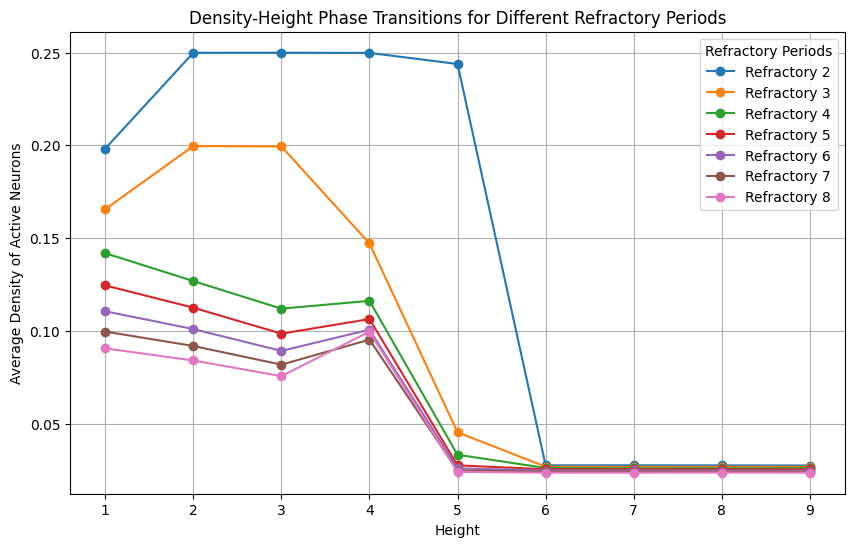

In [2]:
height_values = range(1, 10)
refractory_periods = [2, 3, 4, 5, 6, 7, 8]

plt.figure(figsize=(10, 6))

for refractory_period in refractory_periods:
    average_densities = []

    for height in height_values:
        file_name = f"data/new_varying_height_{height}_ref_{refractory_period}.csv"
        data = pd.read_csv(file_name)

        average_density = data["spikes_total"].mean() / (50 * 50)
        average_densities.append(average_density)

    plt.plot(height_values, average_densities, marker='o', label=f'Refractory {refractory_period}')

plt.xlabel('Height')
plt.ylabel('Average Density of Active Neurons')
plt.title('Density-Height Phase Transitions for Different Refractory Periods')

plt.legend(title="Refractory Periods")
plt.grid(True)
plt.show()

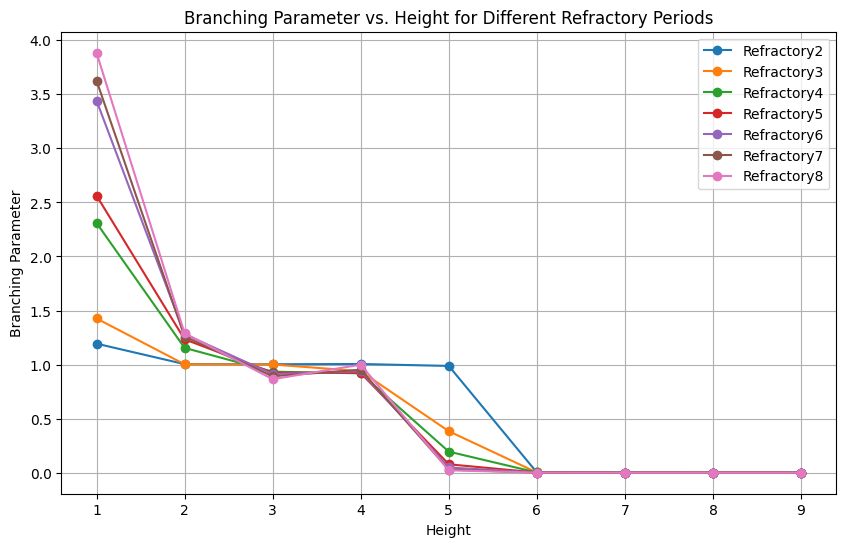

In [3]:
branching_params_by_ref = {rp: [] for rp in refractory_periods}

for rp in refractory_periods:
    for height in height_values:
        file_name = f"data/new_varying_height_{height}_ref_{rp}.csv"
        data = pd.read_csv(file_name)
        sigma= branching_prameter(data)
        branching_params_by_ref[rp].append(sigma)

plt.figure(figsize=(10, 6))
for rp, branching_params in branching_params_by_ref.items():
    plt.plot(height_values, branching_params, marker='o', label=f'Refractory{rp}')

plt.xlabel('Height')
plt.ylabel('Branching Parameter')
plt.title('Branching Parameter vs. Height for Different Refractory Periods')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.plot(height_values, average_densities, marker='o')
plt.xlabel('Height')
plt.ylabel('Average Density of Active Neurons')
plt.title('Density-Height Phase Transitions')
plt.grid(True)
plt.show()

In [ ]:
branching_params = []

for height in height_values:
    filename = f"data/new_varying_height_{height}.csv"
    data = pd.read_csv(filename)
    sigma = branching_prameter(data)
    branching_params.append(sigma)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(height_values, branching_params, marker='o')
plt.xlabel('Height')
plt.ylabel('Branching Parameter')
plt.title('Branching Parameter vs. Height')
plt.grid(True)
plt.show()

In [ ]:
height_to_check = [3, 4]
branching_parameters = {}

for height in height_to_check:
    file_name = f"data/varying_height_{height}.csv"
    data = pd.read_csv(file_name)
    sigma = branching_prameter(data)  # Ensure the function name is correctly spelled as 'branching_parameter'
    branching_parameters[height] = sigma

print(branching_parameters)

In [ ]:
refractory_period_values = range(1, 10)
average_densities_1 = []

for refractory_period in refractory_period_values:
    filename = f"data/new_varying_refractory_{refractory_period}.csv"
    data_1 = pd.read_csv(filename)

    average_density_1 = data_1['spikes_total'].mean() / (50 * 50)
    average_densities_1.append(average_density_1)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(refractory_period_values, average_densities_1, marker='o')
plt.title("Refractory Period vs. Average Density of Active Neurons")
plt.xlabel("Refractory Period")
plt.ylabel("Average Density of Active Neurons")
plt.grid(True)
plt.show()

In [ ]:
refractory_period_to_check = [3, 4]
branching_parameters = {}

for refractory_period in refractory_period_to_check:
    file_name = f"data/new_varying_refractory_{refractory_period}.csv"
    data = pd.read_csv(file_name)
    sigma = branching_prameter(data)
    branching_parameters[refractory_period] = sigma

print(branching_parameters)

In [ ]:
branching_params = []

for refractory_period in refractory_period_values:
    filename = f"data/new_varying_refractory_{refractory_period}.csv"
    data = pd.read_csv(filename)
    sigma = branching_prameter(data)
    branching_params.append(sigma)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(refractory_period_values, branching_params, marker='o')
plt.xlabel('Refractory Period')
plt.ylabel('Branching Parameter')
plt.title('Branching Parameter vs. Refractory Period')
plt.grid(True)
plt.ylim([min(branching_params) - 0.6, max(branching_params) + 0.6])
plt.show()